In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as mso
import matplotlib.ticker as ticker
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, norm

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/BhavanishDhamnaskar/Diwalisalesdata/main/Diwali%20Sales%20Data.csv",encoding='unicode_escape')

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [10]:
df.drop(columns=['User_ID', 'Product_ID', 'Status', 'unnamed1'])

,Cust_name,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,Sanskriti,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,Kartik,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,Bindu,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,Sudevi,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,Joni,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...
11246,Manning,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,Reichenbach,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,Oshin,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,Noonan,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [11]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [15]:
cols_num = df.select_dtypes(include = ['float', 'int']).columns.to_list ()
cols_cat = df.select_dtypes(include = ['object', 'category']).columns.to_list()

In [16]:
#Now let's look at the kurtosis and skewness of each variable.
for col in cols_num:
    print('==' * 30)
    print(f'Variable: {col}\n')
    print(f'Skew = {df[col].skew()}')
    print(f'Kurtosis = {df[col].kurt()}')
    print('==' * 30)
    print('\n')

Variable: User_ID

Skew = 0.002933126682713673
Kurtosis = -1.1758195931352287


Variable: Age

Skew = 1.183203633076307
Kurtosis = 2.4642790073598126


Variable: Marital_Status

Skew = 0.3228963546847678
Kurtosis = -1.896075025783324


Variable: Orders

Skew = 0.0195789723936794
Kurtosis = -1.3527130581443787


Variable: Amount

Skew = 0.5580257366658404
Kurtosis = -0.5402092965421805


Variable: Status

Skew = nan
Kurtosis = nan


Variable: unnamed1

Skew = nan
Kurtosis = nan




## EDA

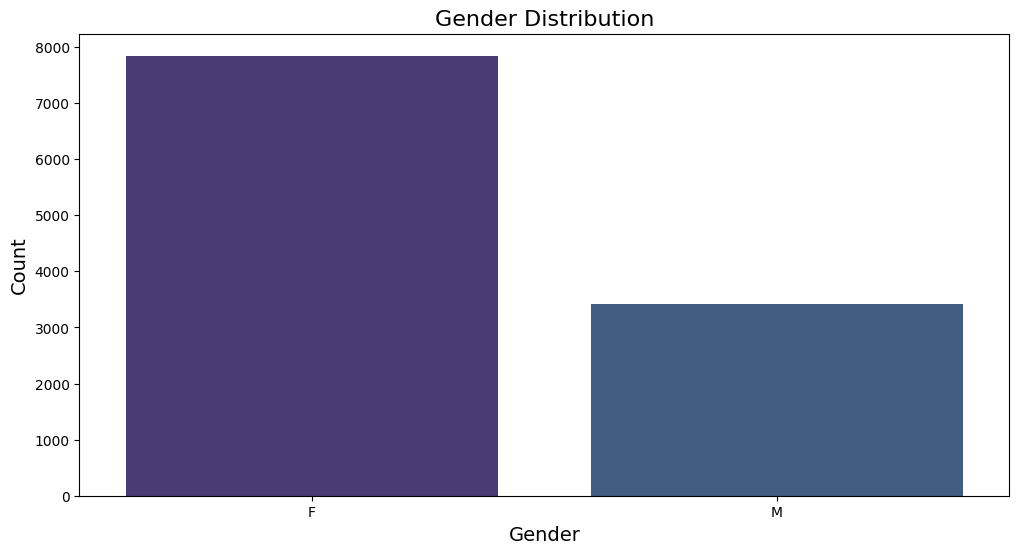

In [17]:
# Set a custom color palette
custom_palette = sns.color_palette("viridis")

# Set a larger chart size
plt.figure(figsize=(12, 6))

# Gender (Categorical data) - Countplot
sns.countplot(data=df, x="Gender", palette=custom_palette)
plt.title("Gender Distribution", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

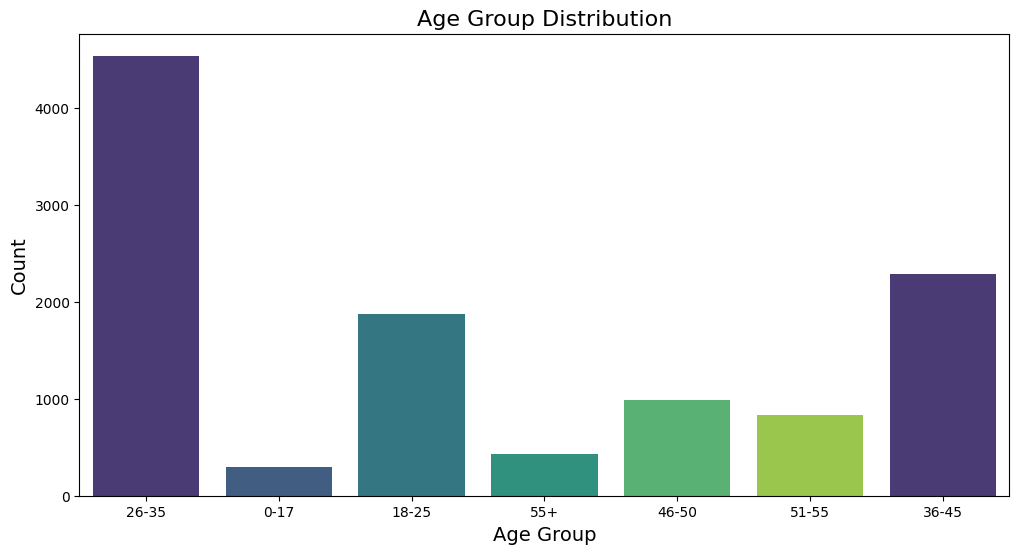

In [18]:
# Age Group (Categorical data) - Countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Age Group", palette=custom_palette)
plt.title("Age Group Distribution", fontsize=16)
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

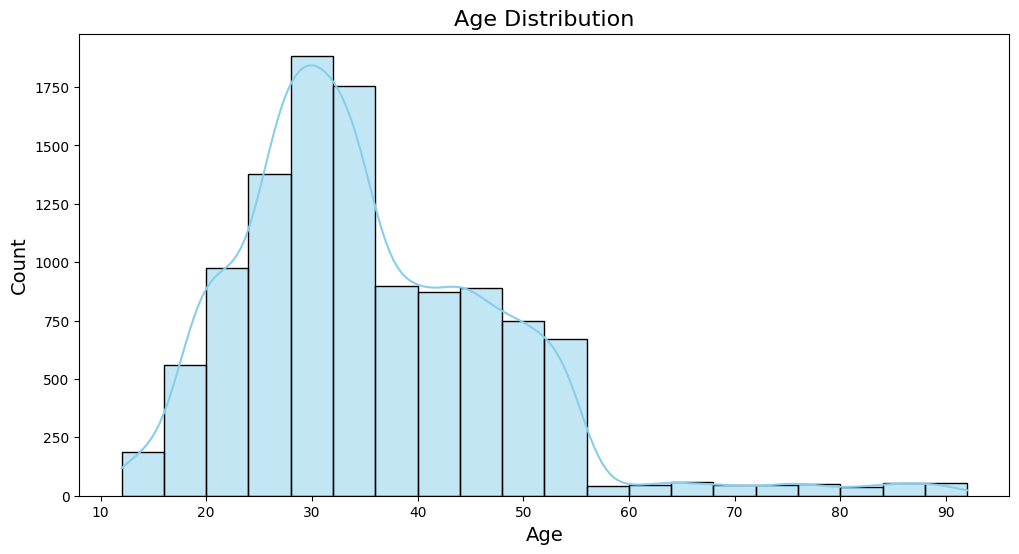

In [19]:
# Age (Numerical data) - Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Age", bins=20, kde=True, color='skyblue')
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

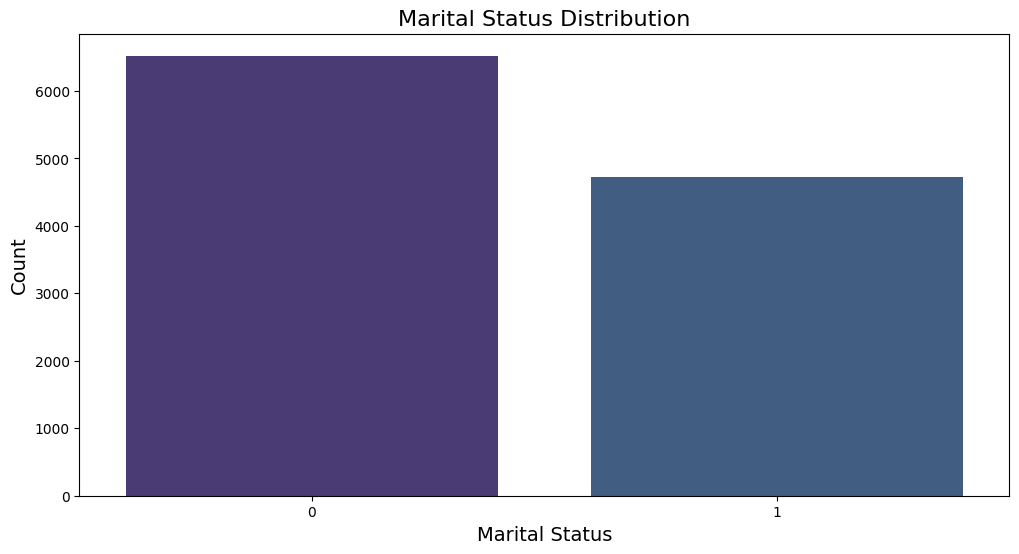

In [20]:
# Marital_Status (Categorical data) - Countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Marital_Status", palette=custom_palette)
plt.title("Marital Status Distribution", fontsize=16)
plt.xlabel("Marital Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

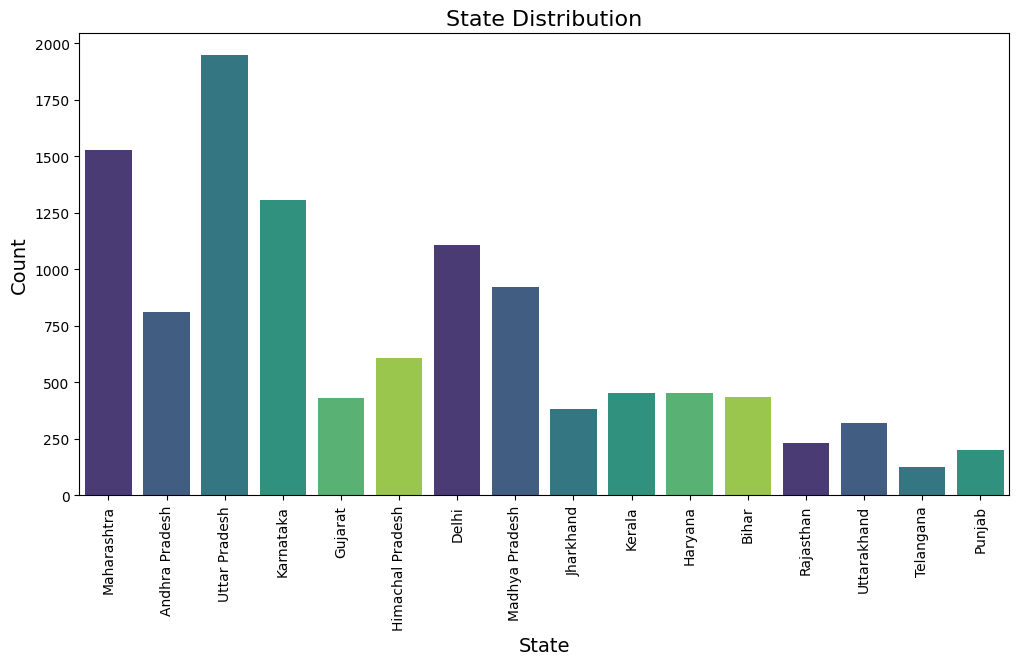

In [21]:
# State (Categorical data) - Countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="State", palette=custom_palette)
plt.title("State Distribution", fontsize=16)
plt.xlabel("State", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90)
plt.show()

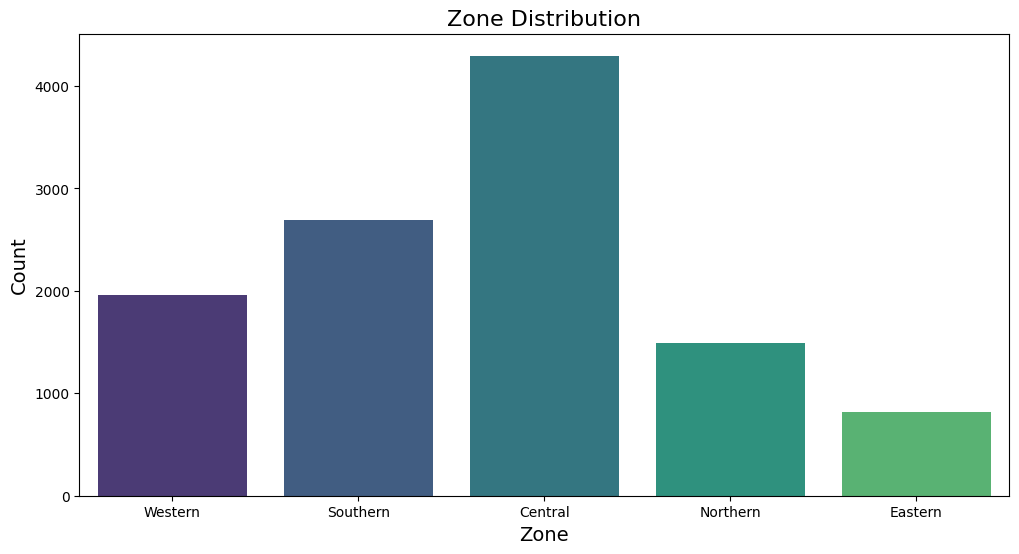

In [25]:
#Zone (Categorical data) - Countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Zone", palette=custom_palette)
plt.title("Zone Distribution", fontsize=16)
plt.xlabel("Zone", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

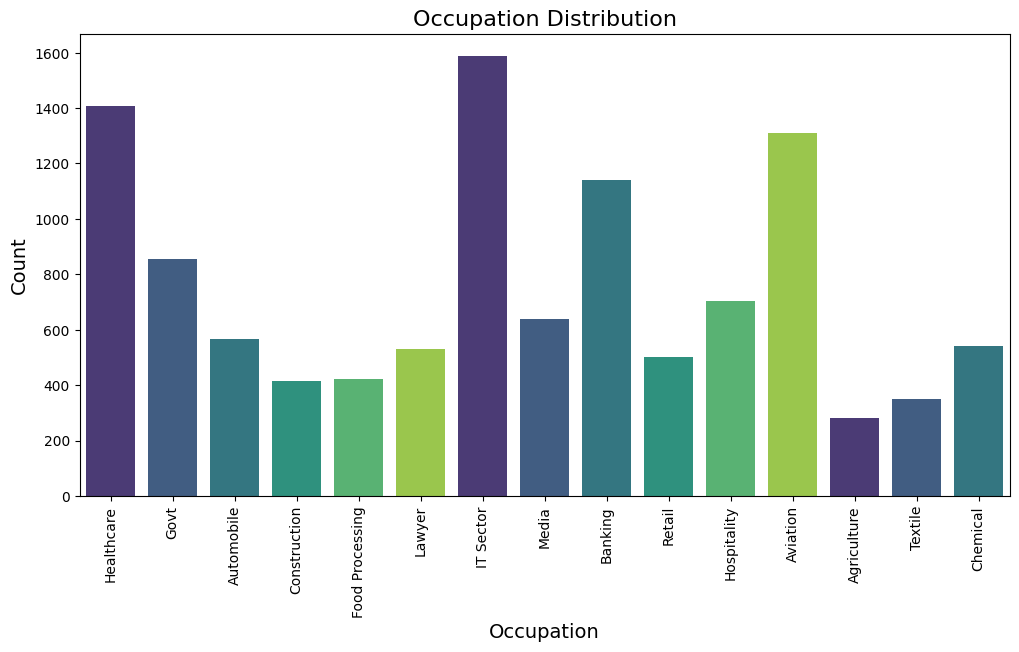

In [26]:
# Occupation (Categorical data) - Countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Occupation", palette=custom_palette)
plt.title("Occupation Distribution", fontsize=16)
plt.xlabel("Occupation", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90)
plt.show()

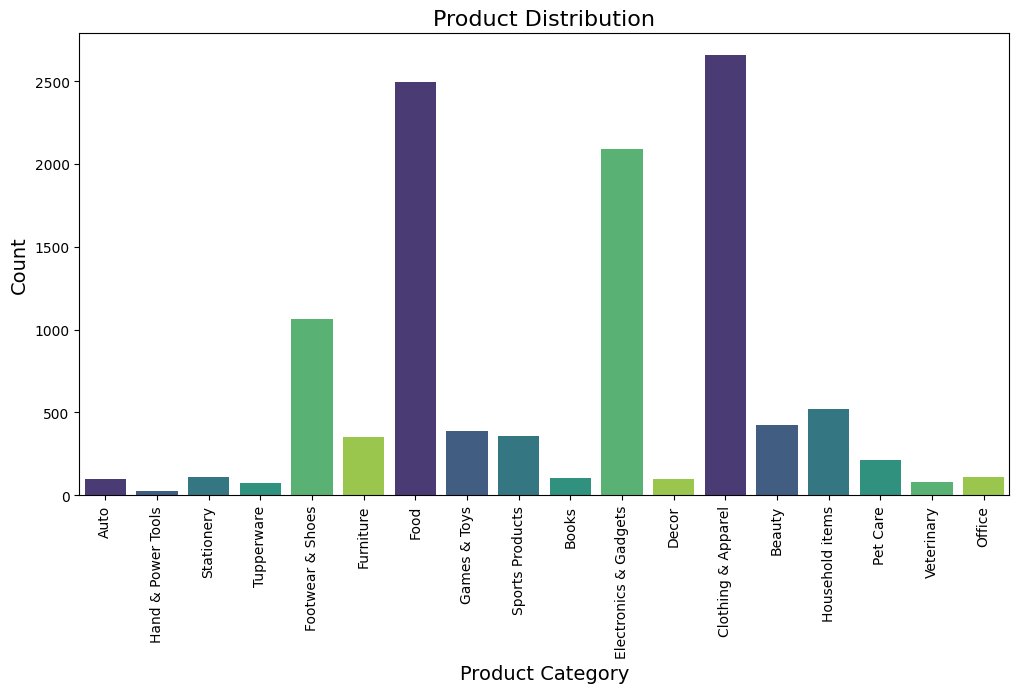

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Product_Category", palette=custom_palette)
plt.title("Product Distribution", fontsize=16)
plt.xlabel("Product Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90)
plt.show()

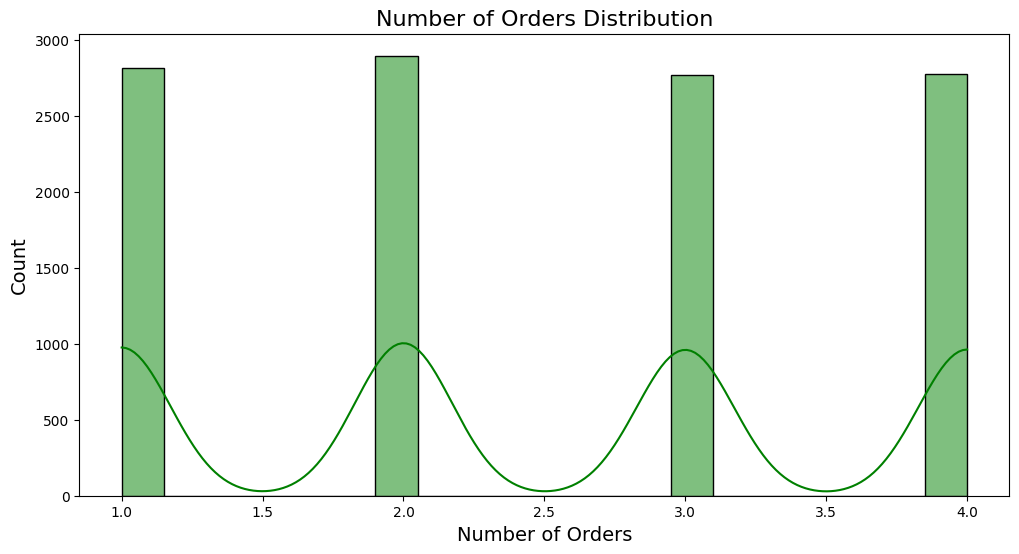

In [28]:
# Orders (Numerical data) - Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Orders", bins=20, kde=True, color='green')
plt.title("Number of Orders Distribution", fontsize=16)
plt.xlabel("Number of Orders", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

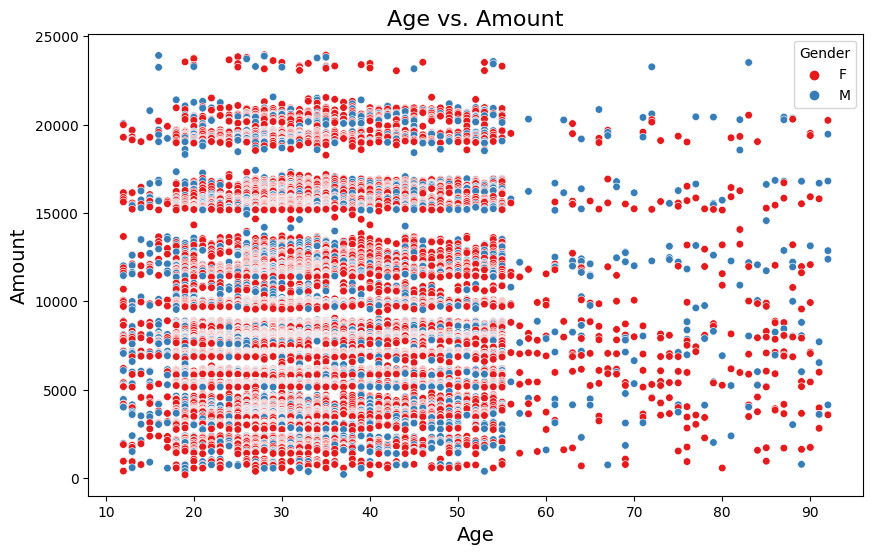

In [30]:
markers = {"Male": "o", "Female": "s"}

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Age", y="Amount", hue="Gender", palette="Set1", s=30, markers=markers)
plt.title("Age vs. Amount", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Amount", fontsize=14)
plt.legend(title="Gender", loc="best")
plt.show()

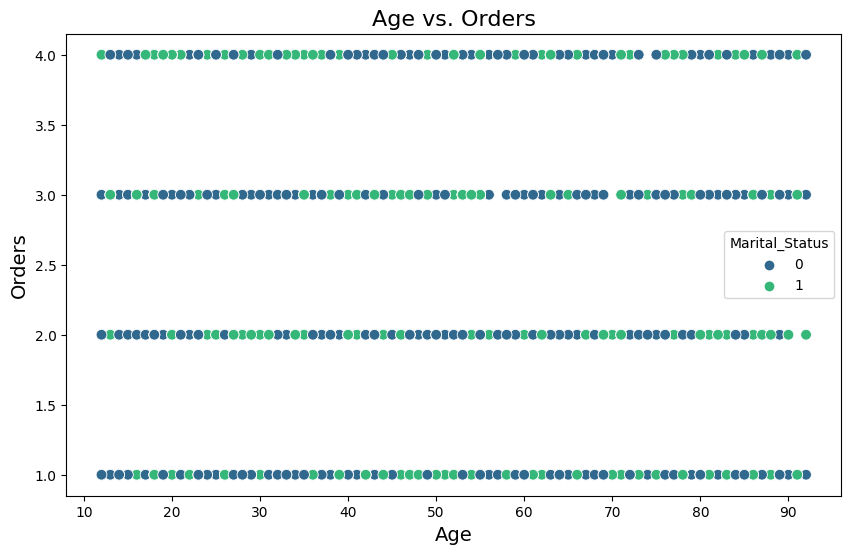

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Age", y="Orders", hue="Marital_Status", palette="viridis", s=60)
plt.title("Age vs. Orders", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Orders", fontsize=14)
plt.show()

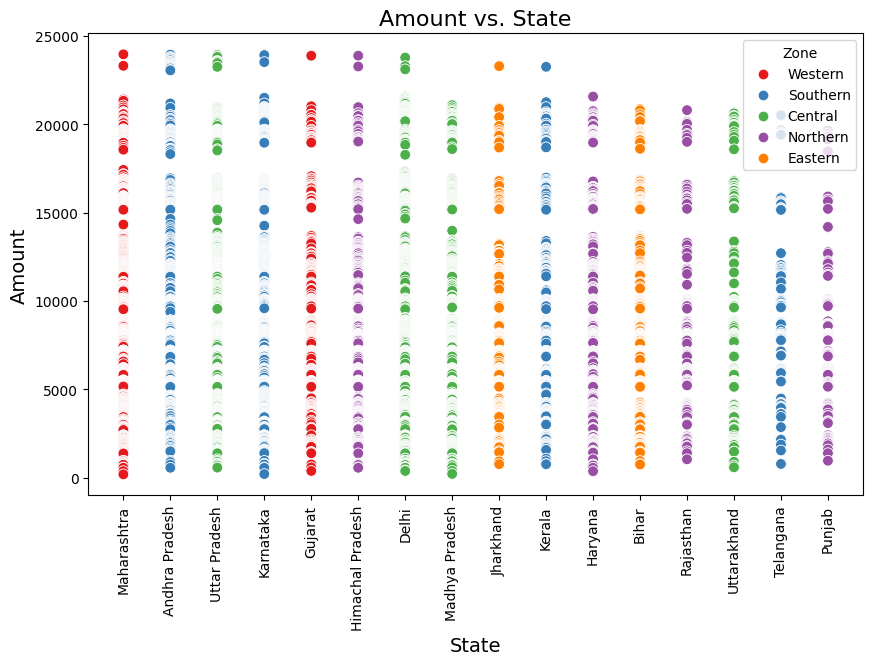

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="State", y="Amount", hue="Zone", palette="Set1", s=60)
plt.title("Amount vs. State", fontsize=16)
plt.xlabel("State", fontsize=14)
plt.ylabel("Amount", fontsize=14)
plt.xticks(rotation=90)
plt.show()

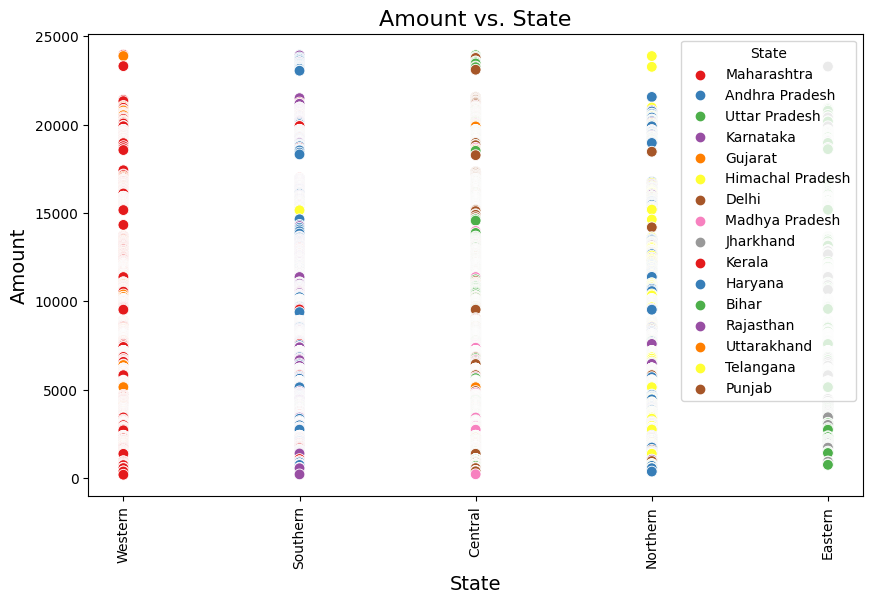

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Zone", y="Amount", hue="State", palette="Set1", s=60)
plt.title("Amount vs. State", fontsize=16)
plt.xlabel("State", fontsize=14)
plt.ylabel("Amount", fontsize=14)
plt.xticks(rotation=90)
plt.show()

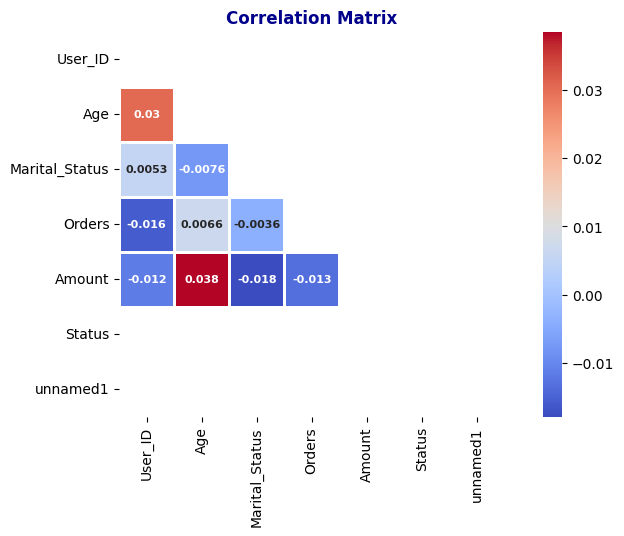

In [34]:
corr_matrix = df[cols_num].corr(method = 'spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

fig,ax = plt.subplots(figsize = (10,5))
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True, annot_kws = {'fontsize':8, 'fontweight':'bold'},
            linewidths = 1.0, square = True, mask = mask, ax = ax)
ax.set_title('Correlation Matrix', fontsize = 12, fontweight = 'bold', color = 'darkblue')
fig.show()